In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 사용 함수

In [50]:
# 한글 패치 진행

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [51]:
# 파이차트 만들기 함수

def make_pie_chart(df_list,colname = "연령대"):

    fig, ax = plt.subplots(1,len(df_list),figsize = (15,5))

    for i, df in enumerate(df_list):
        age_counts = df[[colname]].value_counts().head(10)
        labels = age_counts.index.tolist()
        sizes = age_counts.values

        ax[i].pie(sizes,
           labels = labels,
           #explode=explode,
           autopct = '%1.1f%%',
           shadow = True, startangle= 90)
        ax[i].set_title(f"{2021 + i} {colname} 파이차트")

    plt.show()

In [52]:
# Butterfly Plot 그리기 함수

def make_butterfly_chart(df1, df2, year = 2020):

    # Butterfly Chart

    plt.figure(figsize = (10,6))

    # 데이터 그리기
    sns.barplot(data = df1, y = '가맹점업종명', x = 'count' , color = 'BLue', label = '2030', errorbar=None)
    sns.barplot(data = df2, y = '가맹점업종명', x = 'count' , color = 'Red', label = '4050', errorbar=None ,estimator = lambda x: -sum(x))

    # 축과 레이블 설정
    plt.axvline(0, color = 'grey', linestyle = '--')
    plt.axis('tight')
    plt.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1)

    plt.gca().spines['top'].set_visible(False)   
    plt.gca().spines['right'].set_visible(False) 
    plt.gca().spines['left'].set_visible(False)    
    plt.gca().spines['bottom'].set_visible(False)   

    plt.title(f"{year}년 세대별 소비 횟수 비교", fontsize=17)
    plt.show()

In [53]:
# 두 집단의 범주 차이 비교

# 나이대로 데이터 분할

#capital_2030 = capital_data[capital_data['연령대'].isin(['20대', '30대'])]
#capital_4050 = capital_data[capital_data['연령대'].isin(['40대', '50대'])]

def age_compare_(category_col_1, category_col_2, category_name, df1, df2, hue = '성별'):

    fig, ax = plt.subplots(1,2,figsize = (14,6))

    sns.barplot(x = df1[category_col_1][df1[category_col_2] == category_name].value_counts(normalize=True).head(10).index,
                y = df1[category_col_1][df1[category_col_2] == category_name].value_counts(normalize=True).head(10).values,
                ax = ax[0], #hue=df1[hue][df1[category_col_2] == category_name].head(10) if hue else None
                )
    #ax[0].pick_params(axis = 'x', rotation = 45)
    ax[0].set_title(f"{category_col_2}, {category_name} Barplot Of df1")

    sns.barplot(x = df2[category_col_1][df2[category_col_2] == category_name].value_counts(normalize=True).head(10).index,
                y = df2[category_col_1][df2[category_col_2] == category_name].value_counts(normalize=True).head(10).values,
                ax = ax[1], #hue=df2[hue][df2[category_col_2] == category_name].head(10) if hue else None
                )
    #ax[1].pick_params(axis = 'x', rotation = 45)
    ax[1].set_title(f"{category_col_1}, {category_name} Barplot Of df2")

    plt.tight_layout()
    plt.show()

# EDA
- 지역 위주의 EDA

In [54]:
data = pd.read_csv('sampled_data/final_data.csv')
data = data.drop('Unnamed: 0', axis= 1)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913931 entries, 0 to 913930
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   거래년월        913931 non-null  object 
 1   고객ID        913931 non-null  int64  
 2   가맹점업종명      913931 non-null  object 
 3   가맹점_광역시도    913931 non-null  object 
 4   가맹점_시군구     913931 non-null  object 
 5   승인건수        913931 non-null  object 
 6   승인금액        913931 non-null  int64  
 7   연령대         913931 non-null  object 
 8   성별          913931 non-null  object 
 9   고객등급        913931 non-null  object 
 10  자택_시도       913931 non-null  object 
 11  자택_시군구      913931 non-null  object 
 12  승인건수_수치화    913931 non-null  int64  
 13  거래년월_분기     913931 non-null  int64  
 14  년도          913931 non-null  int64  
 15  가맹점업종명_범주화  913931 non-null  object 
 16  연도_분기       913931 non-null  object 
 17  금리          913931 non-null  float64
 18  소비자심리지수     841639 non-null  float64
 19  자택

In [56]:
data.describe()

,고객ID,승인금액,승인건수_수치화,거래년월_분기,년도,금리,소비자심리지수,가맹점_인구
count,9.139310e+05,9.139310e+05,913931.000000,913931.000000,913931.000000,913931.000000,841639.000000,743635.000000
mean,6.324793e+09,7.342397e+04,5.450050,2.520899,2022.012386,2.149783,98.387537,314308.192323
std,1.921177e+09,2.025373e+05,2.156789,1.113379,0.815289,1.231973,6.190494,183865.187633
min,2.801780e+09,1.000000e+04,5.000000,1.000000,2021.000000,0.500000,88.600000,120437.000000
25%,4.685034e+09,1.000000e+04,5.000000,2.000000,2021.000000,1.000000,91.000000,121312.000000
50%,6.173177e+09,3.000000e+04,5.000000,3.000000,2022.000000,2.500000,98.400000,364638.000000
75%,7.935687e+09,7.000000e+04,5.000000,4.000000,2023.000000,3.500000,103.500000,486752.000000
max,9.999981e+09,9.900000e+06,25.000000,4.000000,2023.000000,3.500000,106.600000,658801.000000


In [57]:
data.isnull().sum()

거래년월               0
고객ID               0
가맹점업종명             0
가맹점_광역시도           0
가맹점_시군구            0
승인건수               0
승인금액               0
연령대                0
성별                 0
고객등급               0
자택_시도              0
자택_시군구             0
승인건수_수치화           0
거래년월_분기            0
년도                 0
가맹점업종명_범주화         0
연도_분기              0
금리                 0
소비자심리지수        72292
자택_인구              0
가맹점_인구        170296
dtype: int64

In [58]:
data[data['소비자심리지수'].isnull() == True]

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,연령대,성별,고객등급,...,자택_시군구,승인건수_수치화,거래년월_분기,년도,가맹점업종명_범주화,연도_분기,금리,소비자심리지수,자택_인구,가맹점_인구
298153,2022-01-01,6694809344,CATV홈쇼핑,서울특별시,영등포구,5번이하,60000,40대,여,일반등급,...,구미시,5,1,2022,기타,2022Q1,1.25,NaN,"서울,경기 아님",375675.0
298154,2022-01-01,4385929070,CATV홈쇼핑,서울특별시,서초구,5번이하,100000,60대이상,여,일반등급,...,경주시,5,1,2022,기타,2022Q1,1.25,NaN,"서울,경기 아님",404325.0
298155,2022-01-01,9652731954,CATV홈쇼핑,서울특별시,강동구,5번이하,80000,60대이상,여,우수등급,...,수성구,5,1,2022,기타,2022Q1,1.25,NaN,"서울,경기 아님",460067.0
298156,2022-01-01,8607930819,CATV홈쇼핑,서울특별시,서초구,5번이하,130000,60대이상,남,일반등급,...,남구,5,1,2022,기타,2022Q1,1.25,NaN,"서울,경기 아님",404325.0
298157,2022-01-01,7047241252,CATV홈쇼핑,서울특별시,영등포구,5번이하,40000,50대,여,우수등급,...,동구,5,1,2022,기타,2022Q1,1.25,NaN,"서울,경기 아님",375675.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370440,2022-03-01,9429378050,화장품,서울특별시,강남구,5번이하,10000,60대이상,여,일반등급,...,북구,5,1,2022,소매_및_생활용품,2022Q1,1.25,NaN,"서울,경기 아님",529102.0
370441,2022-03-01,9528405294,화장품,서울특별시,강남구,5번이하,210000,50대,남,우수등급,...,동구,5,1,2022,소매_및_생활용품,2022Q1,1.25,NaN,"서울,경기 아님",529102.0
370442,2022-03-01,8553665053,화장품,서울특별시,강남구,5번이하,280000,40대,여,일반등급,...,남구,5,1,2022,소매_및_생활용품,2022Q1,1.25,NaN,"서울,경기 아님",529102.0
370443,2022-03-01,9683891296,화장품,서울특별시,강남구,5번이하,120000,60대이상,여,일반등급,...,남구,5,1,2022,소매_및_생활용품,2022Q1,1.25,NaN,"서울,경기 아님",529102.0


In [59]:
data['가맹점업종명'][data['가맹점업종명_범주화']=='인터넷P/G'].value_counts()

가맹점업종명
인터넷P/G    385256
기타 전문점     83630
이동통신요금     32507
편 의 점      22504
손해보험       20445
           ...  
혼례서비스업         1
음반영상물          1
농기계            1
단체복            1
제 화            1
Name: count, Length: 104, dtype: int64

In [60]:
data[data['가맹점_인구'].isnull() == True]

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,연령대,성별,고객등급,...,자택_시군구,승인건수_수치화,거래년월_분기,년도,가맹점업종명_범주화,연도_분기,금리,소비자심리지수,자택_인구,가맹점_인구
315,2021-01-01,4098836345,E1가스충전소,경기도,이천시,5번이하,20000,40대,남,일반등급,...,중구,5,1,2021,인터넷P/G,2021Q1,0.5,97.8,"서울,경기 아님",NaN
316,2021-01-01,3677963178,E1가스충전소,경기도,용인시 처인구,5번이하,50000,20대,남,일반등급,...,경산시,5,1,2021,인터넷P/G,2021Q1,0.5,97.8,"서울,경기 아님",NaN
317,2021-01-01,3738126362,GS가스충전소,경기도,군포시,5번이하,180000,50대,여,일반등급,...,군포시,5,1,2021,교통_및_물류,2021Q1,0.5,97.8,274100.0,NaN
318,2021-01-01,3738126362,GS가스충전소,경기도,군포시,5번이하,180000,50대,여,일반등급,...,군포시,5,1,2021,교통_및_물류,2021Q1,0.5,97.8,274100.0,NaN
319,2021-01-01,3738126362,GS가스충전소,경기도,군포시,5번이하,180000,50대,여,일반등급,...,군포시,5,1,2021,교통_및_물류,2021Q1,0.5,97.8,274100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913901,2023-12-01,5569509477,화장품,경기도,부천시 소사구,5번이하,20000,30대,여,우수등급,...,남구,5,4,2023,소매_및_생활용품,2023Q4,3.5,98.4,"서울,경기 아님",NaN
913902,2023-12-01,8249796155,화장품,경기도,부천시 소사구,5번이하,20000,50대,여,일반등급,...,수성구,5,4,2023,소매_및_생활용품,2023Q4,3.5,98.4,"서울,경기 아님",NaN
913903,2023-12-01,3609922392,화장품,경기도,부천시 원미구,5번이하,870000,30대,여,일반등급,...,용산구,5,4,2023,소매_및_생활용품,2023Q4,3.5,98.4,213151.0,NaN
913904,2023-12-01,3609922392,화장품,경기도,부천시 원미구,5번이하,870000,30대,여,일반등급,...,용산구,5,4,2023,소매_및_생활용품,2023Q4,3.5,98.4,213151.0,NaN


In [61]:
data[data['가맹점_광역시도'] == '경기도'].count()

거래년월          170296
고객ID          170296
가맹점업종명        170296
가맹점_광역시도      170296
가맹점_시군구       170296
승인건수          170296
승인금액          170296
연령대           170296
성별            170296
고객등급          170296
자택_시도         170296
자택_시군구        170296
승인건수_수치화      170296
거래년월_분기       170296
년도            170296
가맹점업종명_범주화    170296
연도_분기         170296
금리            170296
소비자심리지수       156597
자택_인구         170296
가맹점_인구             0
dtype: int64

# 통계분석
- 지역별 소비 비율은 카이제곱으로
- 지역별 분류 및 클러스터링
- 분류 기준을 잡자

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         8
           B       1.00      1.00      1.00         5
           C       1.00      1.00      1.00         3
           D       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



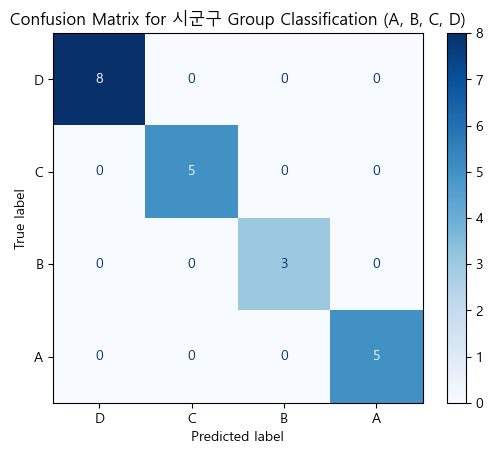

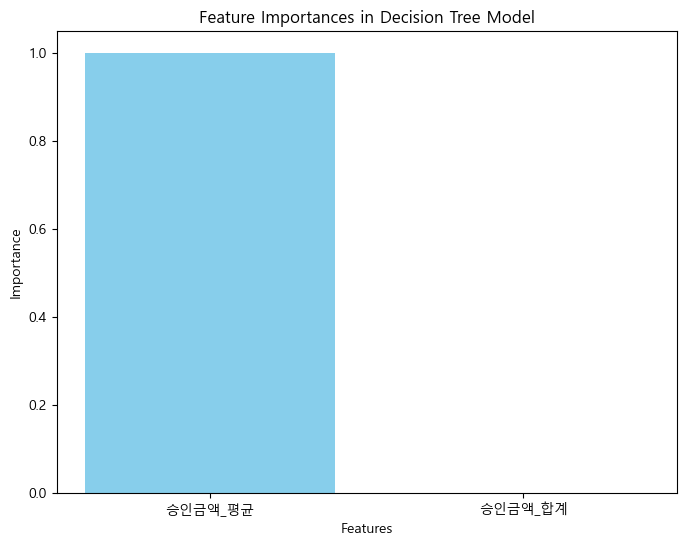

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

def label_data(data):
    grouped_data = data.groupby('가맹점_시군구').agg({
        '승인금액': ['mean', 'sum']
    }).reset_index()
    grouped_data.columns = ['가맹점_시군구', '승인금액_평균', '승인금액_합계']
    
    # 가상의 레이블 생성 (임의의 기준을 가정)
    grouped_data['그룹'] = pd.qcut(grouped_data['승인금액_평균'], q=4, labels=['D', 'C', 'B', 'A'])
    return grouped_data

# 데이터에 라벨 추가
labeled_data = label_data(data)

# 특성(X)과 타겟(y) 분리
X = labeled_data[['승인금액_평균', '승인금액_합계']]
y = labeled_data['그룹']

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 의사결정나무 모델 생성 및 학습
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test, display_labels=['D', 'C', 'B', 'A'], cmap='Blues')
plt.title("Confusion Matrix for 시군구 Group Classification (A, B, C, D)")
plt.show()

# 특성 중요도 시각화
plt.figure(figsize=(8, 6))
plt.bar(X.columns, tree_model.feature_importances_, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Decision Tree Model')
plt.show()

### T-sne 차원축소 및 시각화 진행
- 가맹점 범주화를 기준으로 업종당 결제 비중이 비슷한 지역끼리 Clustering

In [111]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [112]:
# 인터넷P/G를 빼야 할 것 같지만 일단은 넣어서 진행해보자.

dat_sne = data[['가맹점_시군구','가맹점업종명_범주화']]

# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

grouped_data.head(2)

가맹점업종명_범주화,교통_및_물류,기타,서비스_및_여가,소매_및_생활용품,식생활,인터넷P/G
가맹점_시군구,,,,,,
가평군,0.054435,0.002016,0.018145,0.086694,0.469758,0.368952
강남구,0.041525,0.166765,0.006016,0.016975,0.044828,0.723891


In [113]:
# t-SNE를 사용하여 차원 축소
tsne = TSNE(n_components=2, random_state=42) #차원을 2개로 축소
tsne_result = tsne.fit_transform(grouped_data)

In [120]:
# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)  # 군집 개수 조정 가능
grouped_data['Cluster'] = kmeans.fit_predict(tsne_result)

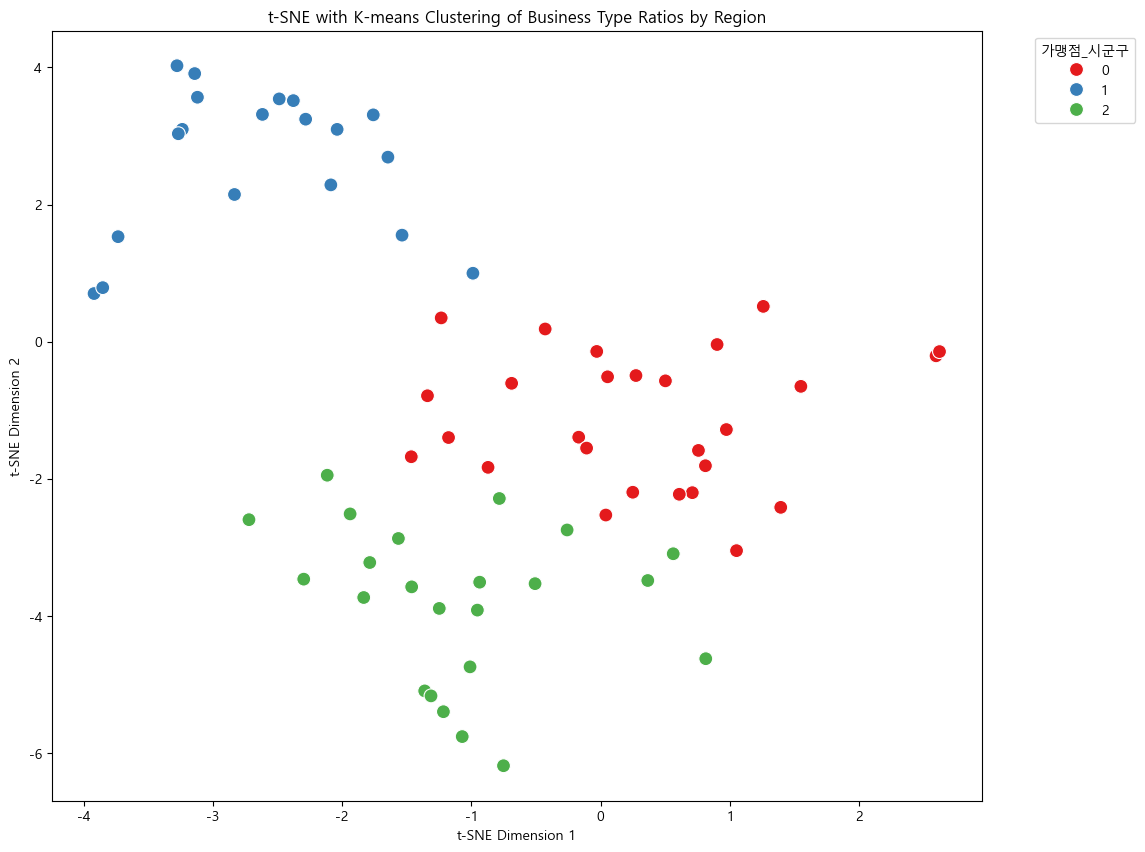

In [122]:
# t-SNE 결과를 데이터프레임에 추가
grouped_data['t-SNE_1'] = tsne_result[:, 0]
grouped_data['t-SNE_2'] = tsne_result[:, 1]

# 시각화

plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='t-SNE_1', y='t-SNE_2',
    hue='Cluster',
    palette="Set1",
    data=grouped_data,
    s=100
)
plt.title('t-SNE with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='가맹점_시군구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Umap을 적용해볼 수 있을까?
- 결과가 엄청나게 유의하지는 않을 듯 하다

In [117]:
#pip install umap-learn -qq

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 22.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ----------------------------- ---------- 11.5/15.6 MB 55.3 MB/s eta 0:00:01
   ---------------------------------------- 15.6/15.6 MB 44.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ---------------- ----------------------- 11.8/28.1 MB 56.5 MB/s eta 0:00:01
   ------------------------------ --------- 21.8/28.1 MB 50.9 MB/s eta 0:00:01
   ---------------------------------------  27.5/28.1 MB 43.6 MB/s eta 0:00:01
   ---------------------------------------- 28.1/28.1 MB 40.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [119]:
import umap
from sklearn.cluster import KMeans

ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.1.

In [123]:
import pandas as pd
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 시군구별 가맹점업종명_범주화 비율 데이터를 활용해 클러스터링
# 실제 파일명으로 대체해주세요

# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# UMAP 적용
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(grouped_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)  # 군집 개수 조정 가능
grouped_data['Cluster'] = kmeans.fit_predict(umap_result)

# UMAP 결과에 클러스터 할당
grouped_data['UMAP_1'] = umap_result[:, 0]
grouped_data['UMAP_2'] = umap_result[:, 1]

# 시각화
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='UMAP_1', y='UMAP_2',
    hue='Cluster',
    palette="viridis",
    data=grouped_data,
    s=100
)
plt.title('UMAP with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.1.